In [191]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
import numpy as np


In [192]:
# Loading the dataset
file_path = "q.csv"
df = pd.read_csv(file_path)

In [193]:

# Cleaning column names
df.columns = df.columns.str.strip().str.upper().str.replace(" ", "_")

# Removing aggregate rows like "TOTAL"
df = df[~df['DISTRICT'].str.upper().str.contains("TOTAL")]

# Total number of IPC crimes recorded
total_ipc_crimes = df['TOTAL_IPC_CRIMES'].sum()

# Average murders per district
avg_murder_per_district = df.groupby("DISTRICT")["MURDER"].mean().mean()

# Crime distribution across states (Top 5)
crime_by_state = df.groupby("STATE/UT")["TOTAL_IPC_CRIMES"].sum().sort_values(ascending=False)
top_states = crime_by_state.head(5)

# Top 5 districts with highest IPC crimes
top_5_districts = df.groupby("DISTRICT")["TOTAL_IPC_CRIMES"].sum().sort_values(ascending=False).head(5)

# Correlation between Murder and Theft
correlation_murder_theft = df['MURDER'].corr(df['THEFT'])



print("Total IPC Crimes:", total_ipc_crimes)
print("Average Murder per District:", avg_murder_per_district)
print("Top 5 States by IPC Crimes:")
print(top_states)
print("Top 5 Districts by IPC Crimes:")
print(top_5_districts)
print("Correlation between Murder and Theft:", correlation_murder_theft)



Total IPC Crimes: 23940654
Average Murder per District: 45.076547602886194
Top 5 States by IPC Crimes:
STATE/UT
MADHYA PRADESH    2413770
MAHARASHTRA       2273436
TAMIL NADU        2060176
ANDHRA PRADESH    2018981
UTTAR PRADESH     1858074
Name: TOTAL_IPC_CRIMES, dtype: int64
Top 5 Districts by IPC Crimes:
DISTRICT
BANGALORE COMMR.    350347
MUMBAI COMMR.       222670
AHMEDABAD COMMR.    218005
INDORE              204398
HYDERABAD CITY      202931
Name: TOTAL_IPC_CRIMES, dtype: int64
Correlation between Murder and Theft: 0.4573453189309557


In [194]:
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler

# Normalizing District Names
df['DISTRICT'] = df['DISTRICT'].str.upper()

# Defining city groups
urban_cities = ['MUMBAI COMMR.', 'HYDERABAD CITY', 'BANGALORE COMMR.', 'AHMEDABAD COMMR.', 'NEW DELHI']
rural_cities = ['BANGALORE RURAL', 'AHMEDABAD RURAL', 'GHAZIPUR', 'FAIZABAD', 'ETAH']

# Criming columns
crime_cols = ['MURDER', 'RAPE', 'ROBBERY', 'THEFT', 'RIOTS']

# Checking column existence
missing = [col for col in crime_cols if col not in df.columns]
if missing:
    raise ValueError(f"Missing columns in dataset: {missing}")

# Filtering and summarizing the data to get radar viz
def prepare_radar(df, cities, group_label):
    radar_data = df[df['DISTRICT'].isin(cities)]
    radar_data = radar_data.groupby('DISTRICT')[crime_cols].sum().reset_index()
    scaler = MinMaxScaler()
    radar_data[crime_cols] = scaler.fit_transform(radar_data[crime_cols])
    radar_data['Group'] = group_label
    return radar_data

urban_df = prepare_radar(df, urban_cities, 'Urban')
rural_df = prepare_radar(df, rural_cities, 'Rural')

# Combining both urban data frame and rural dataframe
combined_df = pd.concat([urban_df, rural_df])

# Plotting Urban Radar Chart
fig_urban = px.line_polar(urban_df.melt(id_vars=["DISTRICT", "Group"]),
                          r='value', theta='variable', color='DISTRICT',
                          line_close=True, title='Urban Cities Crime Radar (Normalized)')
fig_urban.show()

# Plotting Rural Radar Chart
fig_rural = px.line_polar(rural_df.melt(id_vars=["DISTRICT", "Group"]),
                          r='value', theta='variable', color='DISTRICT',
                          line_close=True, title='Rural Cities Crime Radar (Normalized)')
fig_rural.show()

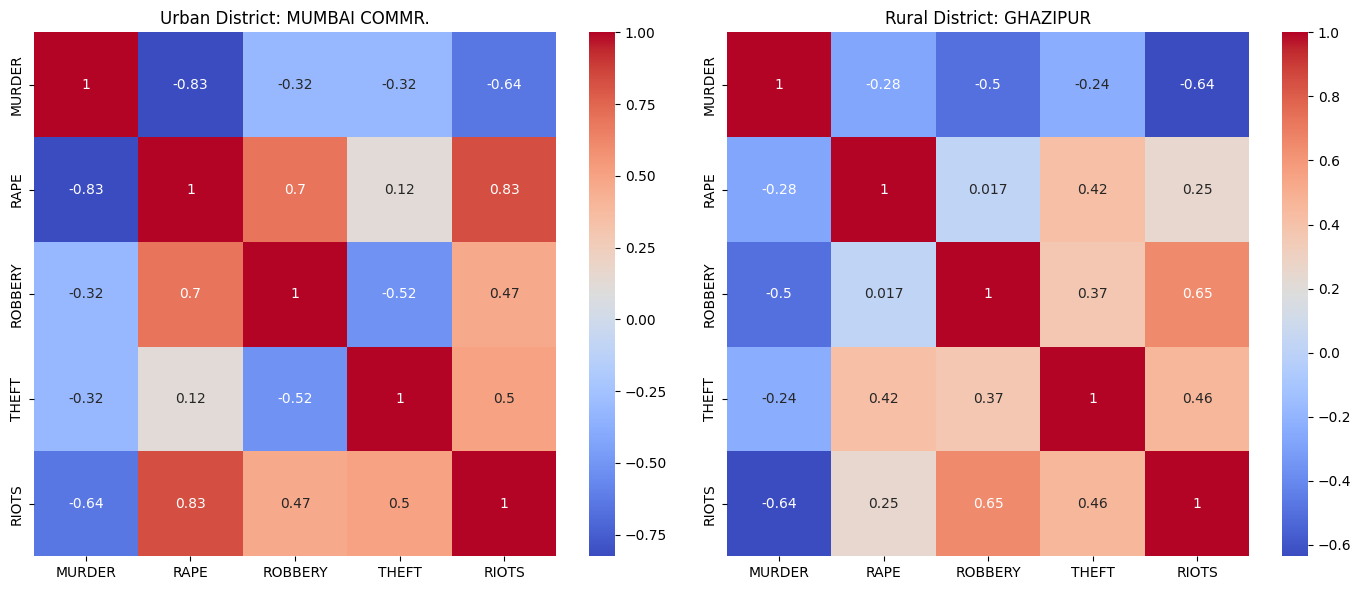

In [195]:

# Ensuring consistent casing
df['DISTRICT'] = df['DISTRICT'].str.upper()

# Defining columns
crime_cols = ['MURDER', 'RAPE', 'ROBBERY', 'THEFT', 'RIOTS']

# Filtering for one urban and one rural district
urban_district = 'MUMBAI COMMR.'
rural_district = 'GHAZIPUR'

urban_data = df[df['DISTRICT'] == urban_district][crime_cols]
rural_data = df[df['DISTRICT'] == rural_district][crime_cols]

# Computing correlation matrices
urban_corr = urban_data.corr()
rural_corr = rural_data.corr()

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.heatmap(urban_corr, annot=True, cmap="coolwarm", ax=axes[0])
axes[0].set_title(f'Urban District: {urban_district}')

sns.heatmap(rural_corr, annot=True, cmap="coolwarm", ax=axes[1])
axes[1].set_title(f'Rural District: {rural_district}')

plt.tight_layout()
plt.show()

<ipython-input-196-23033228b3b2>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




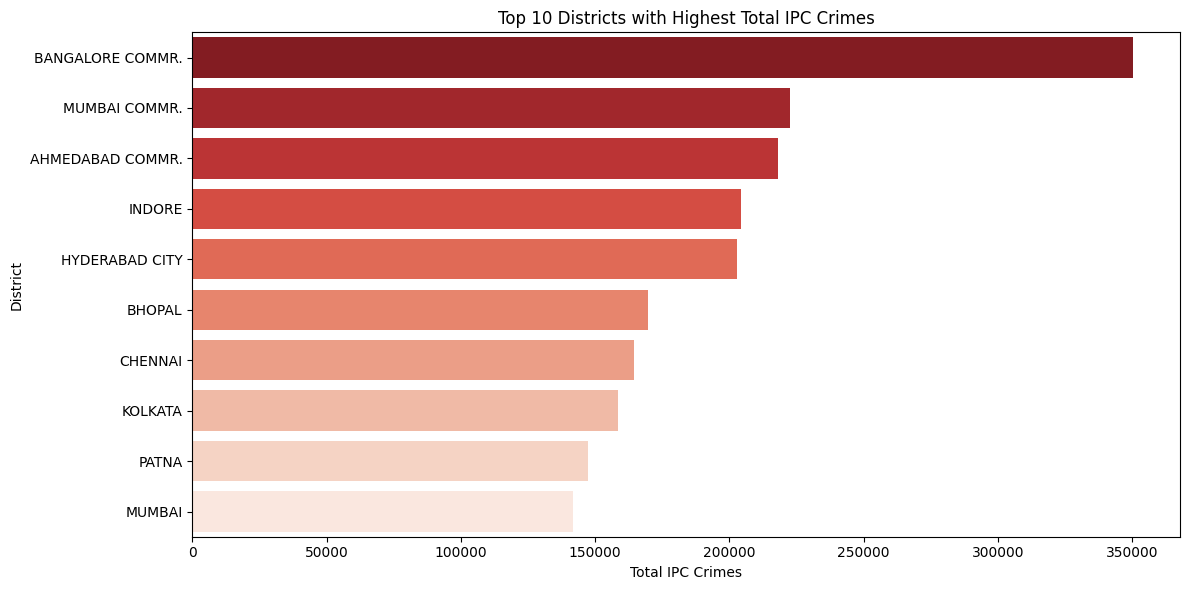

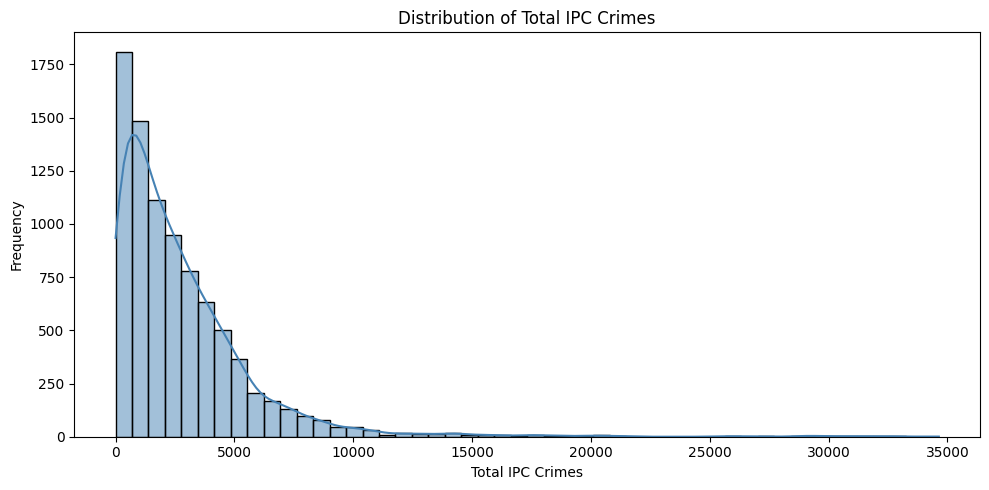

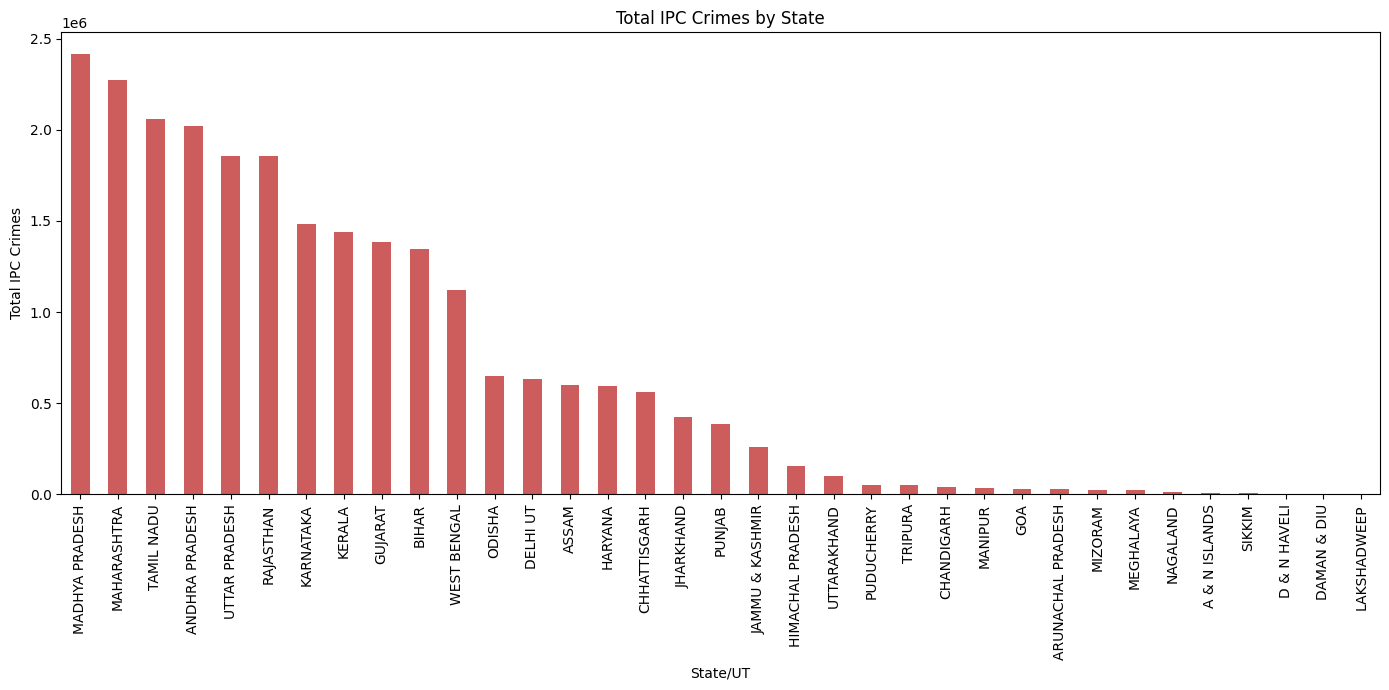

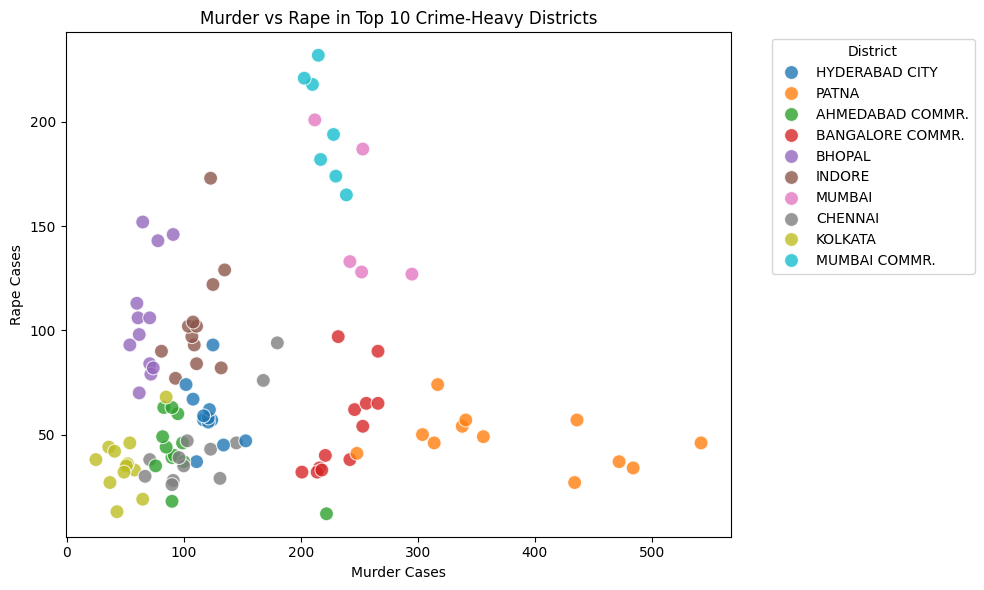

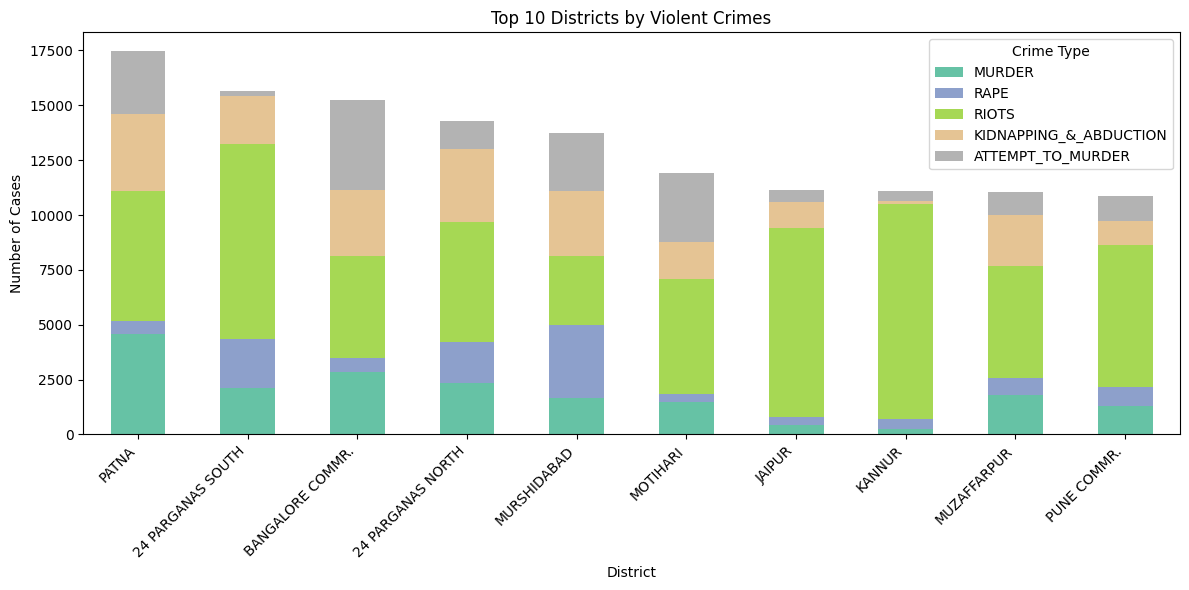

In [196]:

df.columns = df.columns.str.strip().str.upper().str.replace(" ", "_")
df = df[~df['DISTRICT'].str.upper().str.contains("TOTAL")]

# ---- STATIC VISUALIZATIONS ----

# Top 10 districts by IPC crimes
top10_districts = df.groupby("DISTRICT")["TOTAL_IPC_CRIMES"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top10_districts.values, y=top10_districts.index, palette="Reds_r")
plt.title("Top 10 Districts with Highest Total IPC Crimes")
plt.xlabel("Total IPC Crimes")
plt.ylabel("District")
plt.tight_layout()
plt.show()

# Distribution of IPC crimes
plt.figure(figsize=(10, 5))
sns.histplot(df["TOTAL_IPC_CRIMES"], bins=50, kde=True, color="steelblue")
plt.title("Distribution of Total IPC Crimes")
plt.xlabel("Total IPC Crimes")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Crime by state
state_crimes = df.groupby("STATE/UT")["TOTAL_IPC_CRIMES"].sum().sort_values(ascending=False)
plt.figure(figsize=(14, 7))
state_crimes.plot(kind='bar', color='indianred')
plt.title("Total IPC Crimes by State")
plt.xlabel("State/UT")
plt.ylabel("Total IPC Crimes")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# Get top 10 districts by total IPC crimes
top10_districts = df.groupby("DISTRICT")["TOTAL_IPC_CRIMES"].sum().nlargest(10).index
top10_df = df[df["DISTRICT"].isin(top10_districts)]

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=top10_df,
    x="MURDER",
    y="RAPE",
    hue="DISTRICT",
    s=100,
    alpha=0.8,
    palette="tab10"
)
plt.title("Murder vs Rape in Top 10 Crime-Heavy Districts")
plt.xlabel("Murder Cases")
plt.ylabel("Rape Cases")
plt.legend(title="District", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

import pandas as pd
import matplotlib.pyplot as plt

# Violent crime columns
violent_crimes = ["MURDER", "RAPE", "RIOTS", "KIDNAPPING_&_ABDUCTION", "ATTEMPT_TO_MURDER"]

# Summing up violent crimes by district
violent_df = df.groupby("DISTRICT")[violent_crimes].sum()

# Computing total violent crimes
violent_df["TOTAL_VIOLENT"] = violent_df.sum(axis=1)

# Top 10 districts with highest violent crimes
top_violent_districts = violent_df.sort_values("TOTAL_VIOLENT", ascending=False).head(10)

# Plotting grouped bar chart
top_violent_districts[violent_crimes].plot(kind="bar", stacked=True, figsize=(12, 6), colormap="Set2")
plt.title("Top 10 Districts by Violent Crimes")
plt.ylabel("Number of Cases")
plt.xlabel("District")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Crime Type")
plt.tight_layout()
plt.show()

In [197]:
pip install cartopy

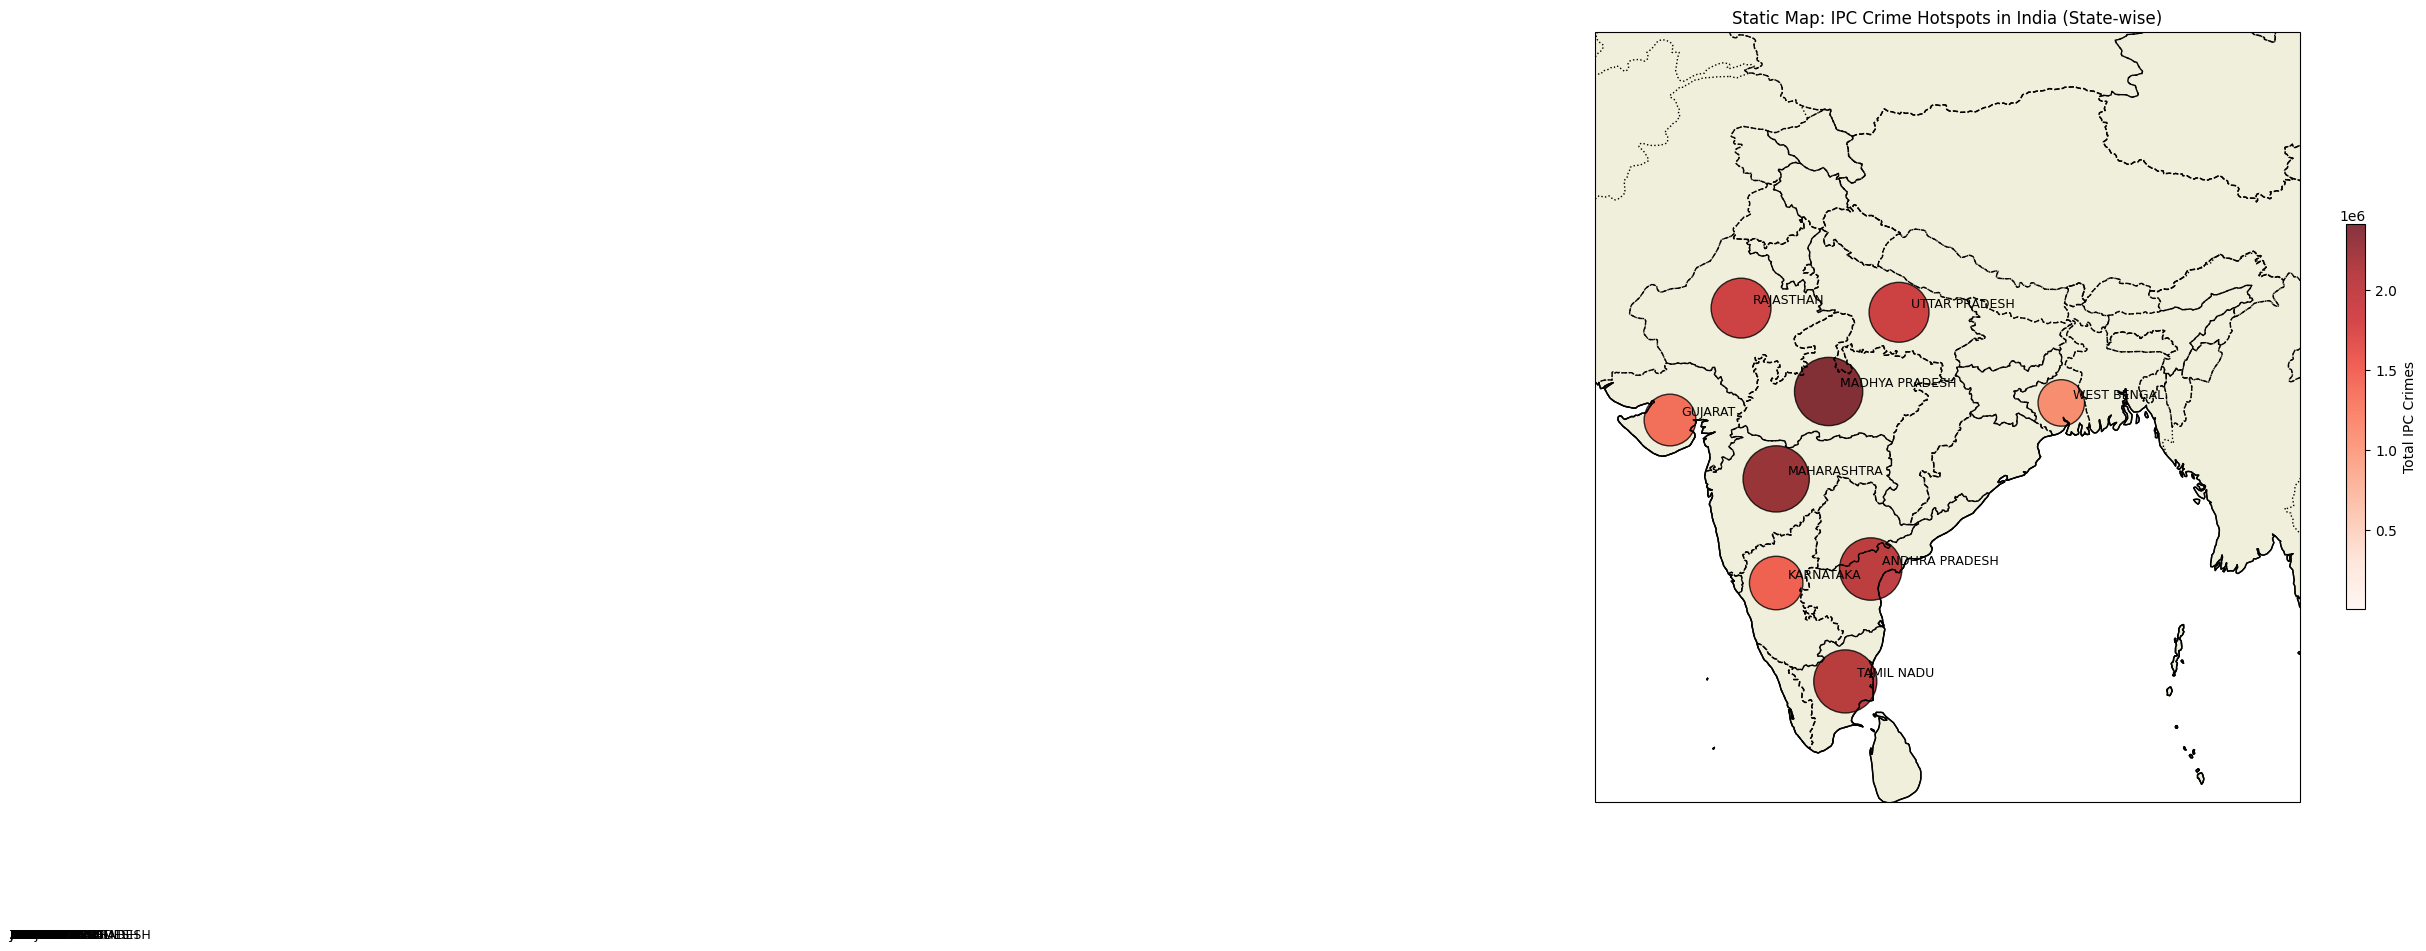

In [198]:
df.columns = df.columns.str.strip().str.upper().str.replace(" ", "_")
df = df[~df['DISTRICT'].str.upper().str.contains("TOTAL")]

# ---- STATIC VISUALIZATIONS ----

# Top 10 districts by IPC crimes
top10_districts = df.groupby("DISTRICT")["TOTAL_IPC_CRIMES"].sum().sort_values(ascending=False).head(10)

# Simulated state-level coordinates
state_coords = {
    "MAHARASHTRA": [19.7515, 75.7139],
    "Uttar Pradesh".upper(): [26.8467, 80.9462],
    "Madhya Pradesh".upper(): [23.4733, 77.9470],
    "Tamil Nadu".upper(): [11.1271, 78.6569],
    "Andhra Pradesh".upper(): [15.9129, 79.7400],
    "Delhi".upper(): [28.7041, 77.1025],
    "Karnataka".upper(): [15.3173, 75.7139],
    "West Bengal".upper(): [22.9868, 87.8550],
    "Gujarat".upper(): [22.2587, 71.1924],
    "Rajasthan".upper(): [27.0238, 74.2179],
}

state_crime = df.groupby("STATE/UT")["TOTAL_IPC_CRIMES"].sum().reset_index()
state_crime["LAT"] = state_crime["STATE/UT"].map(lambda x: state_coords.get(x, [0, 0])[0])
state_crime["LON"] = state_crime["STATE/UT"].map(lambda x: state_coords.get(x, [0, 0])[1])

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Setting up figure and map
fig = plt.figure(figsize=(12, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([68, 98, 6, 38])  # Rough bounding box for India

# Adding map features
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES, linestyle='--')

# Plotting each state
scatter = ax.scatter(
    state_crime["LON"],
    state_crime["LAT"],
    s=state_crime["TOTAL_IPC_CRIMES"] / 1000,  # adjust size scale
    c=state_crime["TOTAL_IPC_CRIMES"],
    cmap='Reds',
    alpha=0.8,
    edgecolors='black',
    transform=ccrs.PlateCarree()
)

# Adding labels
for _, row in state_crime.iterrows():
    ax.text(row["LON"] + 0.5, row["LAT"] + 0.2, row["STATE/UT"], fontsize=9,
            transform=ccrs.PlateCarree())

# Adding colorbar
cbar = plt.colorbar(scatter, ax=ax, orientation='vertical', shrink=0.5, pad=0.05)
cbar.set_label("Total IPC Crimes")

plt.title("Static Map: IPC Crime Hotspots in India (State-wise)")
plt.show()

In [199]:
df.columns = df.columns.str.strip().str.upper().str.replace(" ", "_")
df = df[~df['DISTRICT'].str.upper().str.contains("TOTAL")]

# Coordinates (simulated)
state_coords = {
    "MAHARASHTRA": [19.7515, 75.7139],
    "UTTAR PRADESH": [26.8467, 80.9462],
    "MADHYA PRADESH": [23.4733, 77.9470],
    "TAMIL NADU": [11.1271, 78.6569],
    "ANDHRA PRADESH": [15.9129, 79.7400],
    "DELHI": [28.7041, 77.1025],
    "KARNATAKA": [15.3173, 75.7139],
    "WEST BENGAL": [22.9868, 87.8550],
    "GUJARAT": [22.2587, 71.1924],
    "RAJASTHAN": [27.0238, 74.2179],
}

# Grouping by state and attach coordinates
state_crime = df.groupby("STATE/UT")["TOTAL_IPC_CRIMES"].sum().reset_index()
state_crime["LAT"] = state_crime["STATE/UT"].map(lambda x: state_coords.get(x, [0, 0])[0])
state_crime["LON"] = state_crime["STATE/UT"].map(lambda x: state_coords.get(x, [0, 0])[1])

# Filtering out zero-coordinates (if any state not in dict)
state_crime = state_crime[(state_crime["LAT"] != 0) & (state_crime["LON"] != 0)]

# Interactive Map
fig = px.scatter_mapbox(
    state_crime,
    lat="LAT",
    lon="LON",
    size="TOTAL_IPC_CRIMES",
    color="TOTAL_IPC_CRIMES",
    hover_name="STATE/UT",
    hover_data={"LAT": False, "LON": False, "TOTAL_IPC_CRIMES": ":,f"},
    size_max=50,
    zoom=4.2,
    mapbox_style="carto-positron",
    title="IPC Crime Hotspots in India (Interactive State-wise Map)"
)

fig.update_layout(
    margin=dict(l=0, r=0, t=50, b=0),
    coloraxis_colorbar=dict(title="Total IPC Crimes"),
    font=dict(family="Arial", size=14, color="black")
)

fig.write_html("interactive_ipc_crime_hotspots_map.html")
fig.show()


📉 State with the lowest total IPC crimes: LAKSHADWEEP (743 crimes)


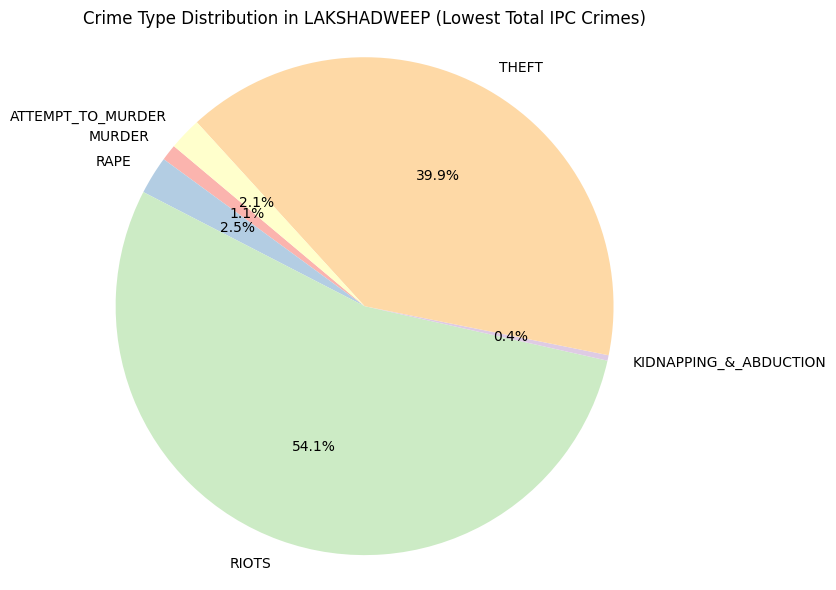

In [200]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


df.columns = df.columns.str.strip().str.upper().str.replace(" ", "_")
df = df[~df["DISTRICT"].str.upper().str.contains("TOTAL")]

# Showing the Lowest Total Crime Rate
state_crime_total = df.groupby("STATE/UT")["TOTAL_IPC_CRIMES"].sum()
lowest_crime_state = state_crime_total.idxmin()
lowest_crime_value = state_crime_total.min()
print(f"📉 State with the lowest total IPC crimes: {lowest_crime_state} ({lowest_crime_value} crimes)")
import matplotlib.pyplot as plt

# 1. Getting the state with the lowest total IPC crimes
state_crime_total = df.groupby("STATE/UT")["TOTAL_IPC_CRIMES"].sum()
lowest_crime_state = state_crime_total.idxmin()
lowest_crime_value = state_crime_total.min()

# 2. Selecting crime type columns (adjust based on actual column names)
crime_types = ["MURDER", "RAPE", "RIOTS", "KIDNAPPING_&_ABDUCTION", "THEFT", "ATTEMPT_TO_MURDER"]

# 3. Filtering data for that state and aggregate
state_data = df[df["STATE/UT"] == lowest_crime_state]
crime_sums = state_data[crime_types].sum()

# 4. Plotting as pie chart
plt.figure(figsize=(8, 6))
plt.pie(crime_sums, labels=crime_sums.index, autopct="%1.1f%%", startangle=140, colors=plt.cm.Pastel1.colors)
plt.title(f"Crime Type Distribution in {lowest_crime_state} (Lowest Total IPC Crimes)")
plt.axis("equal")
plt.tight_layout()
plt.show()





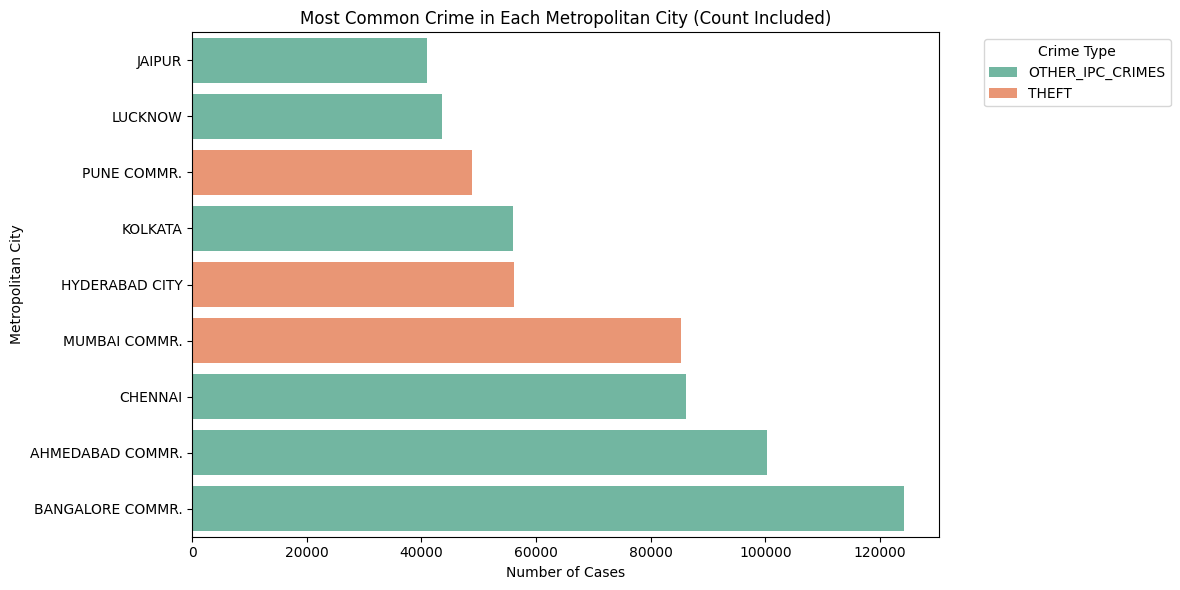

In [201]:
# Defining your list of metro cities
metro_cities = [
    "MUMBAI COMMR.", "DELHI", "HYDERABAD CITY",
    "BANGALORE COMMR.", "CHENNAI", "KOLKATA",
    "AHMEDABAD COMMR.", "PUNE COMMR.", "LUCKNOW", "JAIPUR"
]

# Filtering to metro districts and calculate most common crime
crime_cols = df.columns.difference(["STATE/UT", "DISTRICT", "YEAR", "TOTAL_IPC_CRIMES"])
metro_df = df[df["DISTRICT"].isin(metro_cities)]
metro_crimes = metro_df.groupby("DISTRICT")[crime_cols].sum()
most_common = metro_crimes.idxmax(axis=1).reset_index()
most_common.columns = ["DISTRICT", "MOST_COMMON_CRIME"]

# Adding count of the most common crime for each district
most_common["CRIME_COUNT"] = most_common.apply(
    lambda row: metro_crimes.loc[row["DISTRICT"], row["MOST_COMMON_CRIME"]], axis=1
)

# Sorting for better visual
most_common_sorted = most_common.sort_values("CRIME_COUNT")

# Plotting horizontal bar chart
plt.figure(figsize=(12, 6))
sns.barplot(
    data=most_common_sorted,
    x="CRIME_COUNT",
    y="DISTRICT",
    hue="MOST_COMMON_CRIME",
    dodge=False,
    palette="Set2"
)
plt.title("Most Common Crime in Each Metropolitan City (Count Included)")
plt.xlabel("Number of Cases")
plt.ylabel("Metropolitan City")
plt.legend(title="Crime Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [202]:
df.columns = df.columns.str.strip().str.upper().str.replace(" ", "_")
df = df[~df['DISTRICT'].str.upper().str.contains("TOTAL")]

#Stating with the Lowest Total Crime Rate
state_crime = df.groupby("STATE/UT")["TOTAL_IPC_CRIMES"].sum()
lowest_crime_state = state_crime.idxmin()
lowest_crime_value = state_crime.min()
print(f"State with the lowest total IPC crimes: {lowest_crime_state} ({lowest_crime_value} crimes)")

#Most Common Crime in Each District
crime_columns = df.columns.difference(['STATE/UT', 'DISTRICT', 'YEAR', 'TOTAL_IPC_CRIMES'])
most_common_crimes = df.groupby("DISTRICT")[crime_columns].sum().idxmax(axis=1)
print("\nMost Common Crime in Each District (Sample):")
print(most_common_crimes.head())




State with the lowest total IPC crimes: LAKSHADWEEP (743 crimes)

Most Common Crime in Each District (Sample):
DISTRICT
24 PARGANAS NORTH    OTHER_IPC_CRIMES
24 PARGANAS SOUTH    OTHER_IPC_CRIMES
A AND N ISLANDS      OTHER_IPC_CRIMES
ADILABAD             OTHER_IPC_CRIMES
AGRA                            THEFT
dtype: object


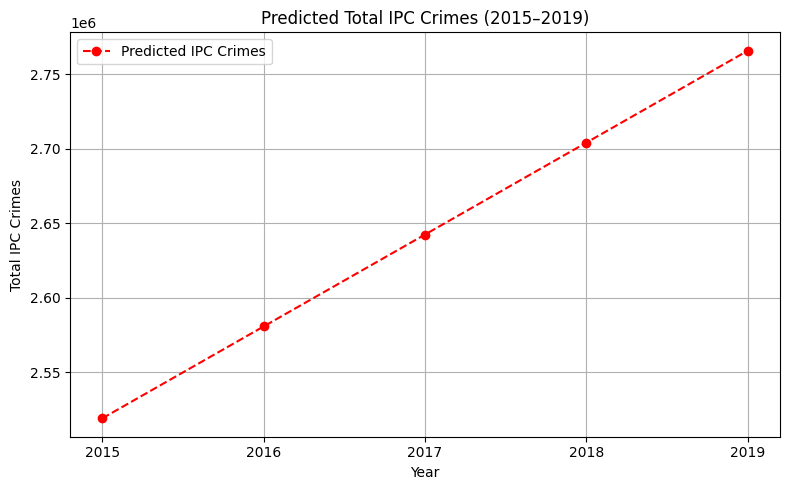

2015: 2519179
2016: 2580840
2017: 2642502
2018: 2704164
2019: 2765825


In [203]:
# Grouping and prepare data
yearly_crime = df.groupby('YEAR')['TOTAL_IPC_CRIMES'].sum().reset_index()
X = yearly_crime['YEAR'].values.reshape(-1, 1)
y = yearly_crime['TOTAL_IPC_CRIMES'].values

# Training model
model = LinearRegression()
model.fit(X, y)

# Predicting future years
future_years = np.array([2015, 2016, 2017, 2018, 2019]).reshape(-1, 1)
future_predictions = model.predict(future_years)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(future_years.flatten(), future_predictions, marker='o', linestyle='--', color='red', label='Predicted IPC Crimes')

# Setting discrete ticks for x-axis
plt.xticks(future_years.flatten())  # ensures only 2015–2019 appear

plt.title("Predicted Total IPC Crimes (2015–2019)")
plt.xlabel("Year")
plt.ylabel("Total IPC Crimes")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Printing predictions
for year, pred in zip(future_years.flatten(), future_predictions):
    print(f"{year}: {int(pred)}")


In [204]:
df.columns

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT_TO_MURDER',
       'CULPABLE_HOMICIDE_NOT_AMOUNTING_TO_MURDER', 'RAPE', 'CUSTODIAL_RAPE',
       'OTHER_RAPE', 'KIDNAPPING_&_ABDUCTION',
       'KIDNAPPING_AND_ABDUCTION_OF_WOMEN_AND_GIRLS',
       'KIDNAPPING_AND_ABDUCTION_OF_OTHERS', 'DACOITY',
       'PREPARATION_AND_ASSEMBLY_FOR_DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO_THEFT', 'OTHER_THEFT', 'RIOTS', 'CRIMINAL_BREACH_OF_TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS_HURT',
       'DOWRY_DEATHS', 'ASSAULT_ON_WOMEN_WITH_INTENT_TO_OUTRAGE_HER_MODESTY',
       'INSULT_TO_MODESTY_OF_WOMEN', 'CRUELTY_BY_HUSBAND_OR_HIS_RELATIVES',
       'IMPORTATION_OF_GIRLS_FROM_FOREIGN_COUNTRIES',
       'CAUSING_DEATH_BY_NEGLIGENCE', 'OTHER_IPC_CRIMES', 'TOTAL_IPC_CRIMES'],
      dtype='object')

In [205]:
from sklearn.linear_model import LogisticRegression

# Aggregating crime types per district
features = ['RAPE', 'MURDER', 'RIOTS', 'KIDNAPPING_&_ABDUCTION', 'ATTEMPT_TO_MURDER']
df_grouped = df.groupby(['STATE/UT', 'DISTRICT'])[features + ['TOTAL_IPC_CRIMES']].mean().reset_index()

# Creating binary label based on TOTAL IPC CRIMES
threshold = df_grouped['TOTAL_IPC_CRIMES'].median()
df_grouped['Crime_Label'] = (df_grouped['TOTAL_IPC_CRIMES'] > threshold).astype(int)

# Preparing features (X) and label (y)
X = df_grouped[features]
y = df_grouped['Crime_Label']

# Normalizing features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting and train model
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluating
y_pred = model.predict(X_test)
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("\nClassification Report:\n", classification_report(y_test, y_pred))

In [206]:
                  # ['RAPE', 'MURDER', 'RIOTS', 'KIDNAPPING_&_ABDUCTION', 'ATTEMPT_TO_MURDER']
test_city_stats_b = [    12,      12,       12,           12,                     12] #
test_city_stats_a = [    233,     4343,     324,          544,                   544] #

scaled_a = scaler.transform([test_city_stats_a])
print("High Crime" if model.predict(scaled_a) == 1 else "Low Crime")


scaled_b = scaler.transform([test_city_stats_b])
print("High Crime" if model.predict(scaled_b) == 1 else "Low Crime")





High Crime
Low Crime


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



Top 10 High Crime Risk Districts:
      STATE/UT         DISTRICT  AVG_TOTAL_IPC_CRIMES    CRI
   MAHARASHTRA    MUMBAI COMMR.          31810.000000 100.00
     KARNATAKA BANGALORE COMMR.          29195.583333  91.78
   MAHARASHTRA           MUMBAI          28363.000000  89.16
     RAJASTHAN           JAIPUR          19905.400000  62.57
       GUJARAT AHMEDABAD COMMR.          18167.083333  57.11
MADHYA PRADESH           INDORE          17033.166667  53.54
ANDHRA PRADESH   HYDERABAD CITY          16910.916667  53.16
        KERALA        ERNAKULAM          15258.000000  47.96
ANDHRA PRADESH        CYBERABAD          14174.300000  44.56
MADHYA PRADESH           BHOPAL          14131.250000  44.42

Bottom 10 Low Crime Risk Districts:
        STATE/UT       DISTRICT  AVG_TOTAL_IPC_CRIMES  CRI
 JAMMU & KASHMIR RAILWAYS JAMMU             14.500000 0.04
           ASSAM           BIEO             16.000000 0.04
        NAGALAND       LONGLENG             14.000000 0.04
 JAMMU & KASHMIR   RAI

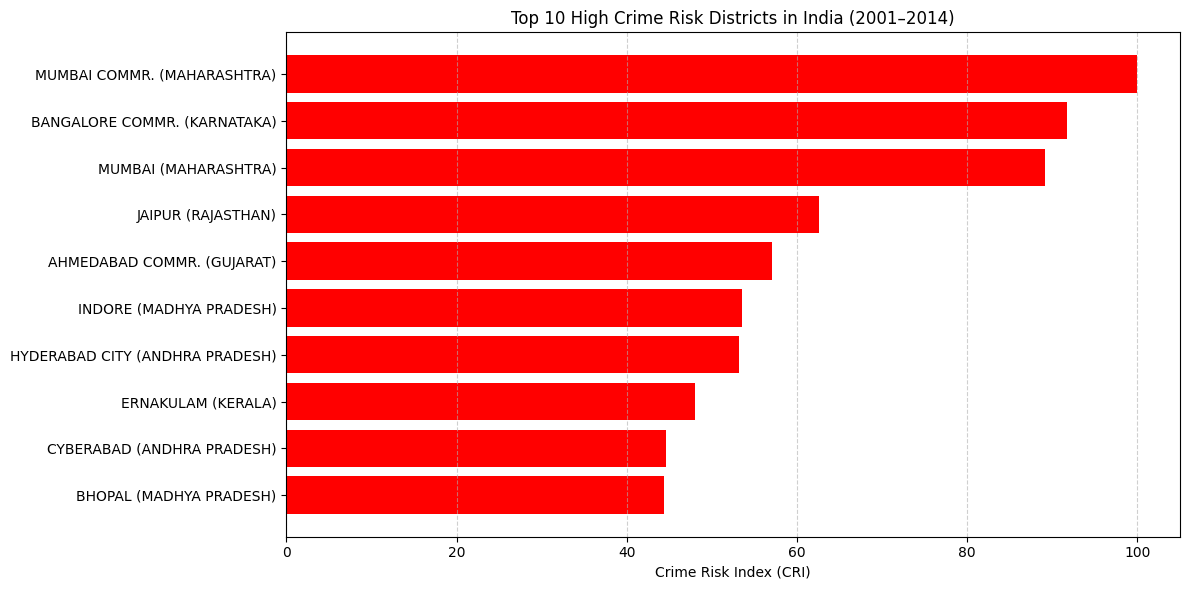

In [207]:
# Computing average total IPC crimes per district
district_crime_avg = df.groupby(['STATE/UT', 'DISTRICT'])['TOTAL_IPC_CRIMES'].mean().reset_index()

district_crime_avg.rename(columns={'TOTAL_IPC_CRIMES': 'AVG_TOTAL_IPC_CRIMES'}, inplace=True)

# Normalizing using min-max scaling
min_crime = district_crime_avg['AVG_TOTAL_IPC_CRIMES'].min()
max_crime = district_crime_avg['AVG_TOTAL_IPC_CRIMES'].max()
district_crime_avg['CRI'] = ((district_crime_avg['AVG_TOTAL_IPC_CRIMES'] - min_crime) /
                             (max_crime - min_crime)) * 100
district_crime_avg['CRI'] = district_crime_avg['CRI'].round(2)

# Sorting and display
district_crime_sorted = district_crime_avg.sort_values(by='CRI', ascending=False)


# Top 10 High CRI
print("Top 10 High Crime Risk Districts:")
print(district_crime_sorted.head(10).to_string(index=False))

# Bottom 10 Low CRI
print("\nBottom 10 Low Crime Risk Districts:")
print(district_crime_sorted.tail(10).to_string(index=False))

# Plotting top 10
top_10 = district_crime_sorted.head(10)
plt.figure(figsize=(12, 6))
plt.barh(top_10['DISTRICT'] + " (" + top_10['STATE/UT'] + ")", top_10['CRI'], color='red')
plt.xlabel('Crime Risk Index (CRI)')
plt.title('Top 10 High Crime Risk Districts in India (2001–2014)')
plt.gca().invert_yaxis()  # Highest at the top
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [208]:
# Previewing column names to identify crimes against women
print("Columns in the dataset:")
print(df.columns.tolist())

# Identifying crimes against women
# Modifying this list to match your actual column names from the dataset
crimes_against_women_cols = [
    col for col in df.columns if 'RAPE' in col.upper()
    or 'MOLESTATION' in col.upper()
    or 'DOWRY' in col.upper()
    or 'CRUELTY BY HUSBAND' in col.upper()
    or 'ASSAULT ON WOMEN' in col.upper()
    or 'INSULT TO MODESTY' in col.upper()
]

# Summing up the crimes against women and total IPC crimes
total_women_crimes = df[crimes_against_women_cols].sum().sum()
total_ipc_crimes = df["TOTAL_IPC_CRIMES"].sum()

# Calculating percentage
percentage = (total_women_crimes / total_ipc_crimes) * 100

print(f"\nPercentage of IPC crimes committed against women: {percentage:.2f}%")


Columns in the dataset:
['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT_TO_MURDER', 'CULPABLE_HOMICIDE_NOT_AMOUNTING_TO_MURDER', 'RAPE', 'CUSTODIAL_RAPE', 'OTHER_RAPE', 'KIDNAPPING_&_ABDUCTION', 'KIDNAPPING_AND_ABDUCTION_OF_WOMEN_AND_GIRLS', 'KIDNAPPING_AND_ABDUCTION_OF_OTHERS', 'DACOITY', 'PREPARATION_AND_ASSEMBLY_FOR_DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT', 'AUTO_THEFT', 'OTHER_THEFT', 'RIOTS', 'CRIMINAL_BREACH_OF_TRUST', 'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS_HURT', 'DOWRY_DEATHS', 'ASSAULT_ON_WOMEN_WITH_INTENT_TO_OUTRAGE_HER_MODESTY', 'INSULT_TO_MODESTY_OF_WOMEN', 'CRUELTY_BY_HUSBAND_OR_HIS_RELATIVES', 'IMPORTATION_OF_GIRLS_FROM_FOREIGN_COUNTRIES', 'CAUSING_DEATH_BY_NEGLIGENCE', 'OTHER_IPC_CRIMES', 'TOTAL_IPC_CRIMES']

Percentage of IPC crimes committed against women: 2.38%


        STATE/UT         DISTRICT  Cluster
0  A & N ISLANDS  A AND N ISLANDS        1
1  A & N ISLANDS          ANDAMAN        1
2  A & N ISLANDS              CAR        1
3  A & N ISLANDS          NICOBAR        1
4  A & N ISLANDS            NORTH        1


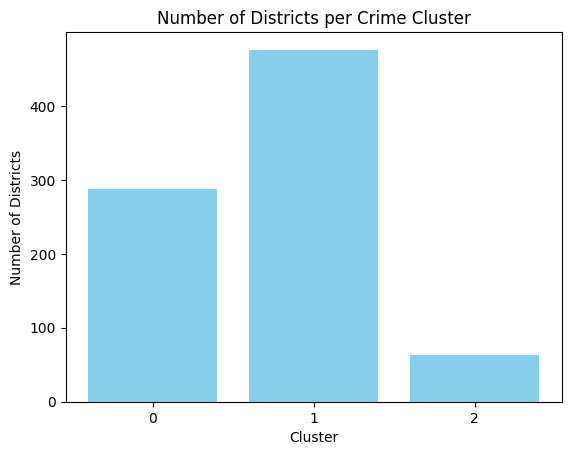

In [209]:
# Selecting and aggregating crime features per district
features = ['RAPE', 'MURDER', 'RIOTS', 'KIDNAPPING_&_ABDUCTION', 'ATTEMPT_TO_MURDER']
df_grouped = df.groupby(['STATE/UT', 'DISTRICT'])[features].mean().reset_index()

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_grouped[features])

# Applying KMeans with 3 clusters (you can try 2 or 4 too)
kmeans = KMeans(n_clusters=3, random_state=42)
df_grouped['Cluster'] = kmeans.fit_predict(X_scaled)

# Showing sample results
print(df_grouped[['STATE/UT', 'DISTRICT', 'Cluster']].head())

# Visualizing cluster count
cluster_counts = df_grouped['Cluster'].value_counts().sort_index()
plt.bar(cluster_counts.index, cluster_counts.values, color='skyblue')
plt.xlabel("Cluster")
plt.ylabel("Number of Districts")
plt.title("Number of Districts per Crime Cluster")
plt.xticks([0, 1, 2])
plt.show()

In [210]:
# Showing a few districts from each cluster
for cluster_id in sorted(df_grouped['Cluster'].unique()):
    print(f"\nSample Districts from Cluster {cluster_id}:")
    # Get the subset for the current cluster
    cluster_subset = df_grouped[df_grouped['Cluster'] == cluster_id][['STATE/UT', 'DISTRICT']]

    # Sampling, adjusting for the size of the cluster
    sample_size = min(5, len(cluster_subset))  # Take at most 5, or the entire cluster if smaller
    sample_districts = cluster_subset.sample(sample_size, random_state=42)

    print(sample_districts.to_string(index=False))


Sample Districts from Cluster 0:
      STATE/UT  DISTRICT
         BIHAR   KATIHAR
MADHYA PRADESH  SHAJAPUR
 UTTAR PRADESH    HARDOI
         BIHAR DARBHANGA
   MAHARASHTRA    SATARA

Sample Districts from Cluster 1:
         STATE/UT            DISTRICT
      WEST BENGAL          DARJEELING
ARUNACHAL PRADESH UPPER DIBANG VALLEY
          HARYANA        AMBALA RURAL
     CHHATTISGARH           KONDAGAON
     CHHATTISGARH               SUKMA

Sample Districts from Cluster 2:
      STATE/UT          DISTRICT
   WEST BENGAL       MURSHIDABAD
   WEST BENGAL 24 PARGANAS SOUTH
ANDHRA PRADESH         CYBERABAD
 UTTAR PRADESH            BADAUN
         ASSAM            DHUBRI


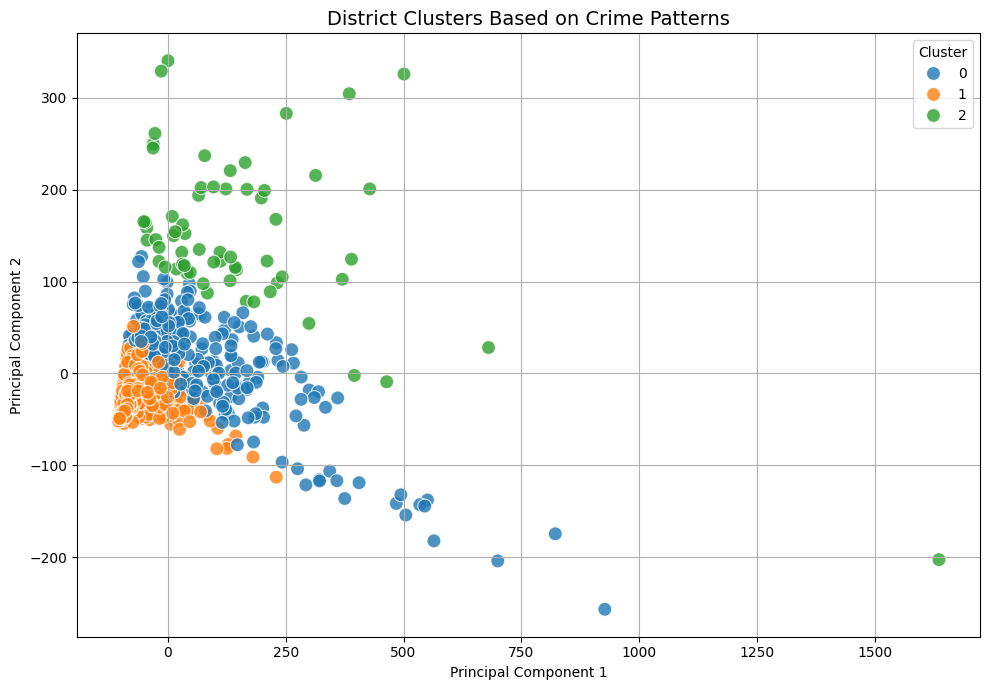

In [211]:
from sklearn.decomposition import PCA

#Choosing numeric features used for clustering
# (Exclude ID columns and the 'Cluster' label itself)
features = df_grouped.select_dtypes(include=[float, int]).drop(columns=["Cluster"], errors='ignore')

#Reducing to 2D using PCA
pca = PCA(n_components=2)
components = pca.fit_transform(features)

#Adding PCA results and cluster info for plotting
plot_df = pd.DataFrame(components, columns=["PC1", "PC2"])
plot_df["Cluster"] = df_grouped["Cluster"].values
plot_df["District"] = df_grouped["DISTRICT"].values
plot_df["State"] = df_grouped["STATE/UT"].values

# Plotting
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=plot_df,
    x="PC1", y="PC2",
    hue="Cluster",
    palette="tab10",
    s=100,
    alpha=0.8
)
plt.title("District Clusters Based on Crime Patterns", fontsize=14)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()


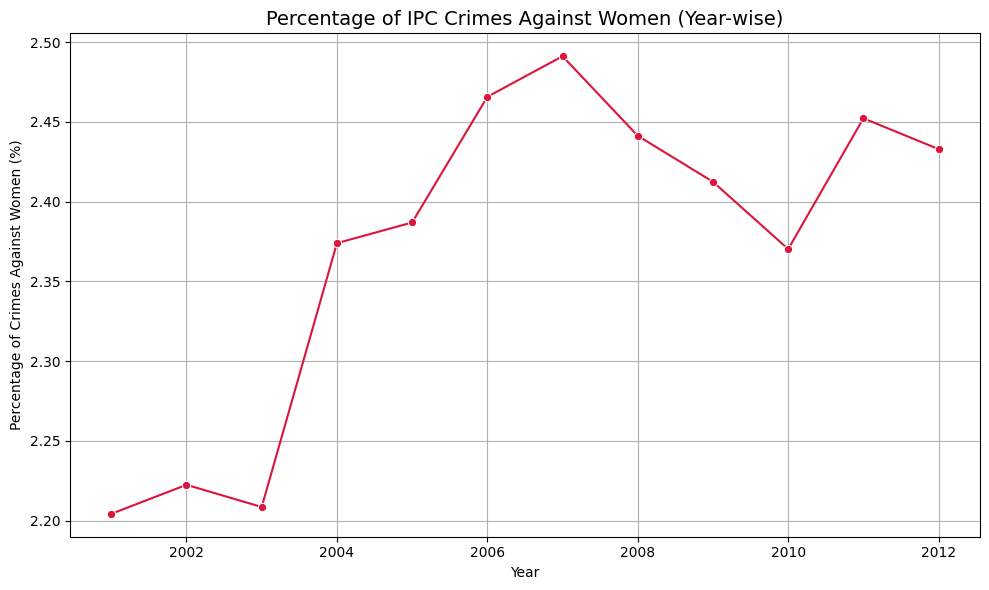

In [212]:
# Identifying columns related to crimes against women
women_crime_cols = [col for col in df.columns if (
    'RAPE' in col.upper() or
    'MOLESTATION' in col.upper() or
    'DOWRY' in col.upper() or
    'CRUELTY BY HUSBAND' in col.upper() or
    'ASSAULT ON WOMEN' in col.upper() or
    'INSULT TO MODESTY' in col.upper()
)]

# Grouping by year
yearly_total = df.groupby("YEAR")["TOTAL_IPC_CRIMES"].sum()
yearly_women = df.groupby("YEAR")[women_crime_cols].sum().sum(axis=1)

# Calculating percentage
yearly_percentage = (yearly_women / yearly_total) * 100
yearly_percentage = yearly_percentage.reset_index()
yearly_percentage.columns = ["YEAR", "Women Crime %"]

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_percentage, x="YEAR", y="Women Crime %", marker="o", color="crimson")
plt.title("Percentage of IPC Crimes Against Women (Year-wise)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Percentage of Crimes Against Women (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [213]:
# Aggregating dowry deaths by state
dowry_deaths_by_state = data.groupby('STATE/UT')['DOWRY DEATHS'].sum()

# Finding the state with the highest dowry deaths
state_with_max_dowry_deaths = dowry_deaths_by_state.idxmax()
max_dowry_deaths = dowry_deaths_by_state.max()

print(f"State with highest dowry deaths: {state_with_max_dowry_deaths} ({max_dowry_deaths} deaths)")



State with highest dowry deaths: UTTAR PRADESH (47648 deaths)


In [214]:
# Aggregating total IPC crimes by district
district_crime_totals = data.groupby('DISTRICT')['TOTAL IPC CRIMES'].sum().sort_values(ascending=False)

print(district_crime_totals.head(10))  # Top 10 districts with highest crime rates

DISTRICT
TOTAL               23307480
DELHI UT TOTAL        633174
BANGALORE COMMR.      350347
MUMBAI COMMR.         222670
AHMEDABAD COMMR.      218005
INDORE                204398
HYDERABAD CITY        202931
BHOPAL                169575
CHENNAI               164467
KOLKATA               158429
Name: TOTAL IPC CRIMES, dtype: int64


In [215]:
# Aggregating dowry deaths by state
dowry_deaths_by_state = data.groupby('STATE/UT')['DOWRY DEATHS'].sum()

# Finding the state with the highest dowry deaths
state_with_max_dowry_deaths = dowry_deaths_by_state.idxmax()
max_dowry_deaths = dowry_deaths_by_state.max()

print(f"State with highest dowry deaths: {state_with_max_dowry_deaths} ({max_dowry_deaths} deaths)")

State with highest dowry deaths: UTTAR PRADESH (47648 deaths)


<ipython-input-216-0334e44bf808>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




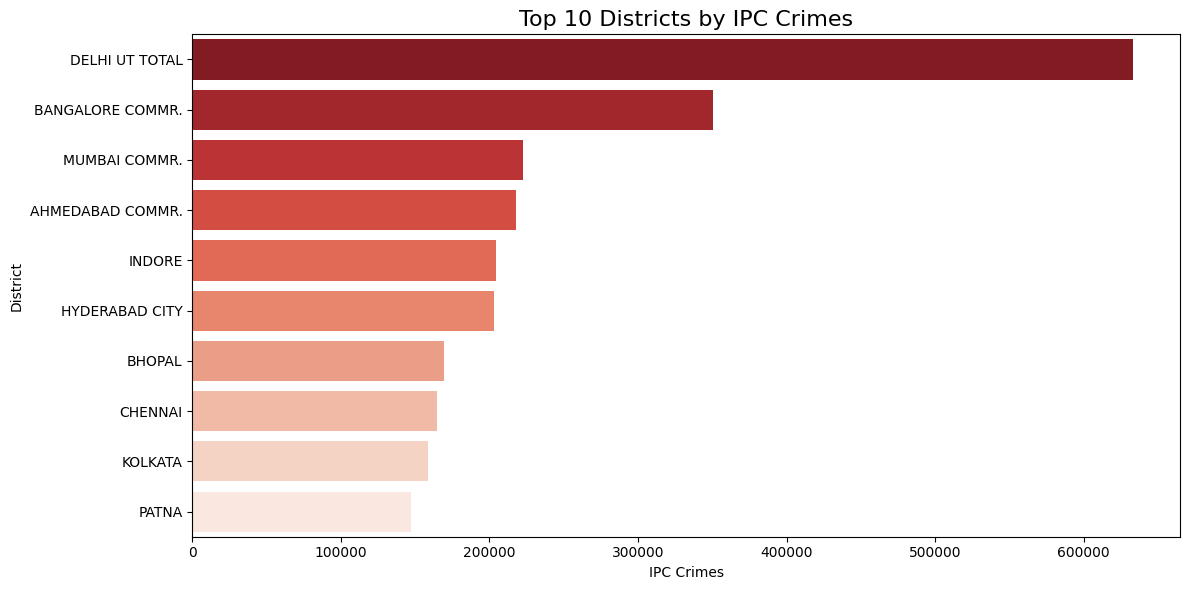

In [216]:
# Filtering out any 'TOTAL' rows
data_filtered = data[data['DISTRICT'].str.upper() != 'TOTAL']

# Aggregating total IPC crimes by district
district_crime_totals = data_filtered.groupby('DISTRICT')['TOTAL IPC CRIMES'].sum().sort_values(ascending=False)

# Preparing Top 10 Districts Data
top10 = district_crime_totals.head(10).reset_index()

# Static Bar Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top10, x='TOTAL IPC CRIMES', y='DISTRICT', palette='Reds_r')

plt.title("Top 10 Districts by IPC Crimes", fontsize=16)
plt.xlabel("IPC Crimes")
plt.ylabel("District")
plt.tight_layout()
plt.show()


<ipython-input-218-1190c2572e81>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




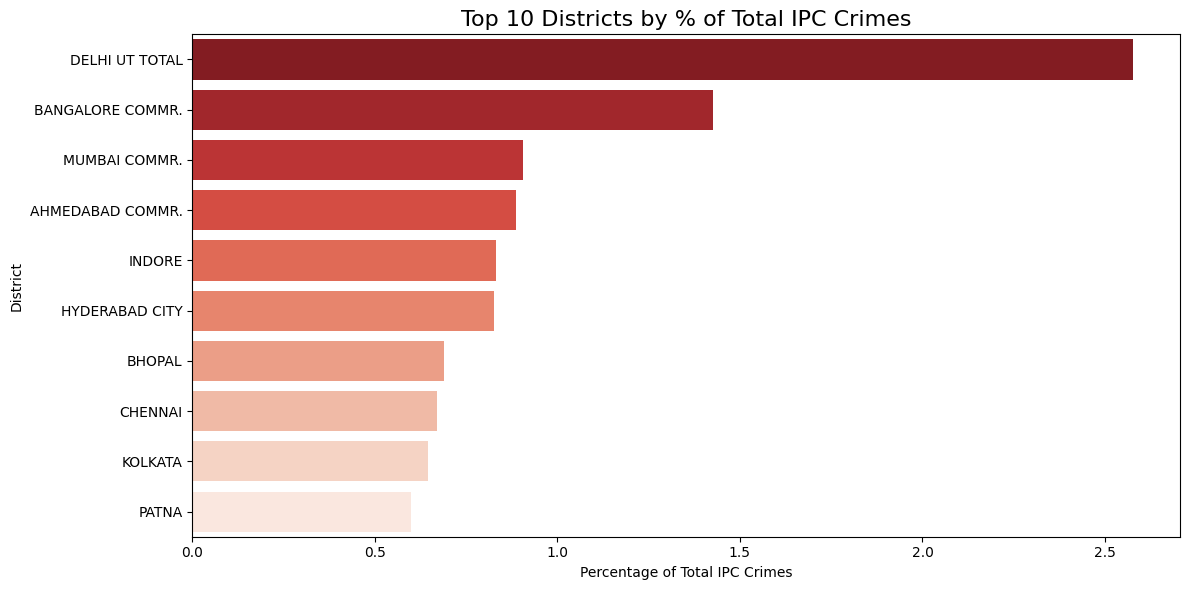

In [218]:
# Filtering out any 'TOTAL' rows
data_filtered = data[data['DISTRICT'].str.upper() != 'TOTAL']

# Aggregating total IPC crimes by district
district_crime_totals = data_filtered.groupby('DISTRICT')['TOTAL IPC CRIMES'].sum()

# Calculating total crimes overall
total_crimes = district_crime_totals.sum()

# Calculating percentage contribution of each district
district_percentages = (district_crime_totals / total_crimes * 100).sort_values(ascending=False)

# Getting top 10 districts by percentage
top10_percent = district_percentages.head(10).reset_index()
top10_percent.columns = ['DISTRICT', 'PERCENTAGE']

# Plotting the Static Bar Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top10_percent, x='PERCENTAGE', y='DISTRICT', palette='Reds_r')

plt.title("Top 10 Districts by % of Total IPC Crimes", fontsize=16)
plt.xlabel("Percentage of Total IPC Crimes")
plt.ylabel("District")
plt.tight_layout()
plt.show()

In [219]:
# Aggregating dowry deaths by state
dowry_deaths_by_state = data.groupby('STATE/UT')['DOWRY DEATHS'].sum()

# Finding the state with the highest dowry deaths
state_with_max_dowry_deaths = dowry_deaths_by_state.idxmax()
max_dowry_deaths = dowry_deaths_by_state.max()

print(f"State with highest dowry deaths: {state_with_max_dowry_deaths} ({max_dowry_deaths} deaths)")

State with highest dowry deaths: UTTAR PRADESH (47648 deaths)


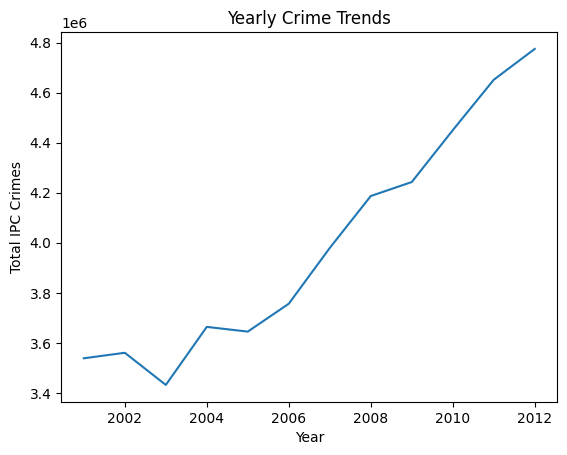

In [220]:

# Grouping by year and calculate total IPC crimes
yearly_trends = data.groupby('YEAR')['TOTAL IPC CRIMES'].sum()

# Plotting seasonal trends
plt.plot(yearly_trends.index, yearly_trends.values)
plt.title('Yearly Crime Trends')
plt.xlabel('Year')
plt.ylabel('Total IPC Crimes')
plt.show()

In [221]:
# Aggregating total IPC crimes by district
district_crime_totals = data.groupby('DISTRICT')['TOTAL IPC CRIMES'].sum().sort_values(ascending=False)

print(district_crime_totals.head(10))  # Top 10 districts with highest crime rates

DISTRICT
TOTAL               23307480
DELHI UT TOTAL        633174
BANGALORE COMMR.      350347
MUMBAI COMMR.         222670
AHMEDABAD COMMR.      218005
INDORE                204398
HYDERABAD CITY        202931
BHOPAL                169575
CHENNAI               164467
KOLKATA               158429
Name: TOTAL IPC CRIMES, dtype: int64


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency YS-JAN will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency YS-JAN will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency YS-JAN will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

<ipython-input-222-d082a5475f29>:15: FutureWarning:

'Y' is deprecated and will be removed in a fut

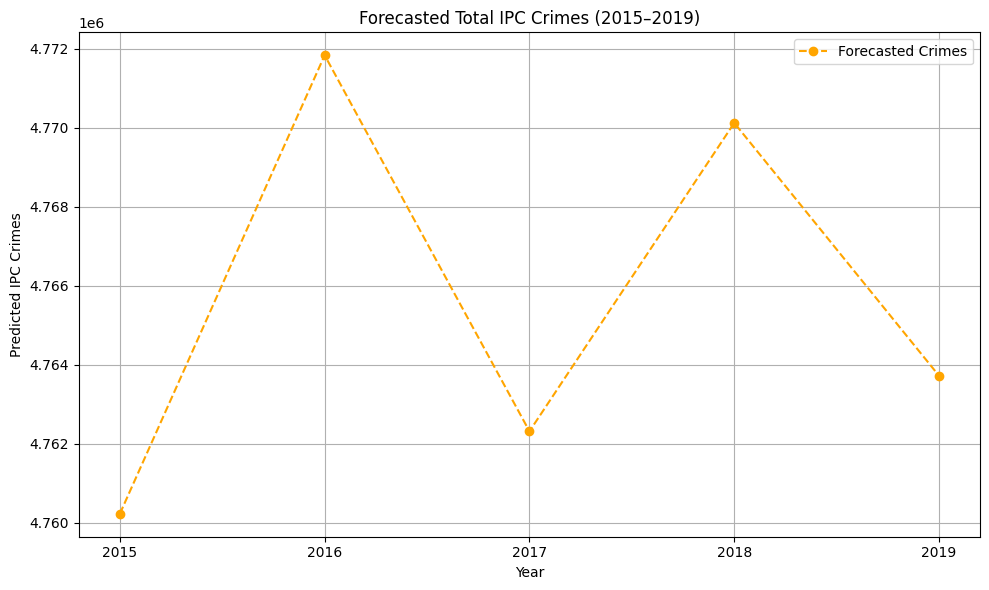

In [222]:
from statsmodels.tsa.arima.model import ARIMA


# Aggregating yearly total IPC crimes
yearly_data = data.groupby('YEAR')['TOTAL IPC CRIMES'].sum()

# Ensuring the index is a datetime index for ARIMA compatibility
yearly_data.index = pd.to_datetime(yearly_data.index, format='%Y')

# Fitting ARIMA model
model = ARIMA(yearly_data, order=(1, 1, 1))
model_fit = model.fit()

# Forecasting for 2015–2019
forecast_years = pd.date_range(start='2015', end='2020', freq='Y')  # ends at 2020 to include 2019
forecast_steps = len(forecast_years)
forecast = model_fit.forecast(steps=forecast_steps)

# Creating a DataFrame for forecasted values
forecast_df = pd.DataFrame({
    'Year': forecast_years.year,
    'Forecasted Crimes': forecast.values
})

# Plotting only forecasted data
plt.figure(figsize=(10, 6))
plt.plot(forecast_df['Year'], forecast_df['Forecasted Crimes'], marker='o', linestyle='--', color='orange', label='Forecasted Crimes')
plt.title('Forecasted Total IPC Crimes (2015–2019)')
plt.xlabel('Year')
plt.ylabel('Predicted IPC Crimes')
plt.xticks(forecast_df['Year'])  # Set discrete year ticks
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


***EXTRA PLOTS***

<ipython-input-223-db6554633ac0>:19: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.



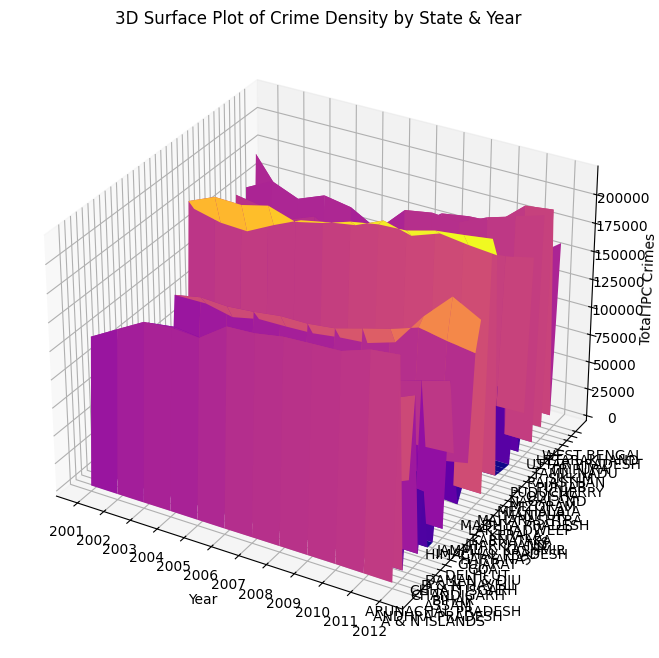

In [223]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

crime_surface = df.groupby(['STATE/UT', 'YEAR'])['TOTAL_IPC_CRIMES'].sum().unstack().fillna(0)
X, Y = np.meshgrid(crime_surface.columns, range(len(crime_surface.index)))
Z = crime_surface.values

fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='plasma')

ax.set_xticks(crime_surface.columns)
ax.set_yticks(range(len(crime_surface.index)))
ax.set_yticklabels(crime_surface.index, rotation=0)
ax.set_xlabel('Year')
ax.set_ylabel('State')
ax.set_zlabel('Total IPC Crimes')
ax.set_title('3D Surface Plot of Crime Density by State & Year')
plt.tight_layout()
plt.show()


***2. 3D Bar Plot — State-wise Crime Explosion***

<ipython-input-224-cbc78ce8d236>:23: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.



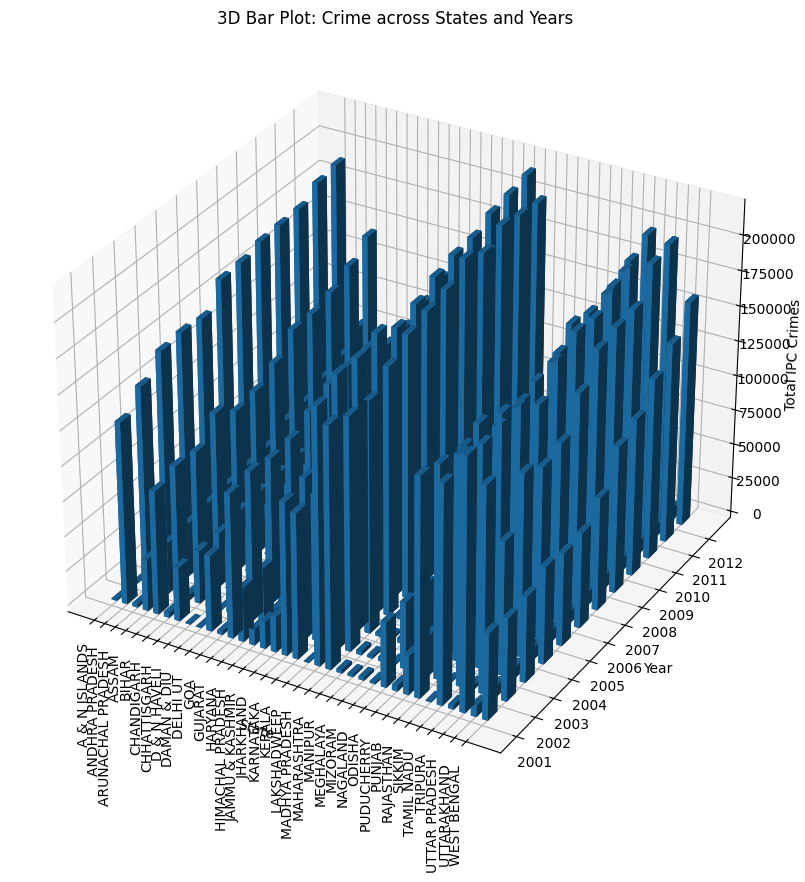

In [224]:
from mpl_toolkits.mplot3d import Axes3D

state_year = df.groupby(['STATE/UT', 'YEAR'])['TOTAL_IPC_CRIMES'].sum().unstack().fillna(0)
fig = plt.figure(figsize=(18, 10))
ax = fig.add_subplot(111, projection='3d')

_x = np.arange(len(state_year.index))
_y = np.arange(len(state_year.columns))
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()
z = np.zeros_like(x)
top = state_year.values.T.ravel()

ax.bar3d(x, y, z, 0.5, 0.5, top, shade=True)
ax.set_xticks(np.arange(len(state_year.index)))
ax.set_xticklabels(state_year.index, rotation=90)
ax.set_yticks(np.arange(len(state_year.columns)))
ax.set_yticklabels(state_year.columns)
ax.set_xlabel('State')
ax.set_ylabel('Year')
ax.set_zlabel('Total IPC Crimes')
plt.title("3D Bar Plot: Crime across States and Years")
plt.tight_layout()
plt.show()


***3. Pairplot (Crime Relationship Matrix) — See Correlations Like Theft ↔ Murder***

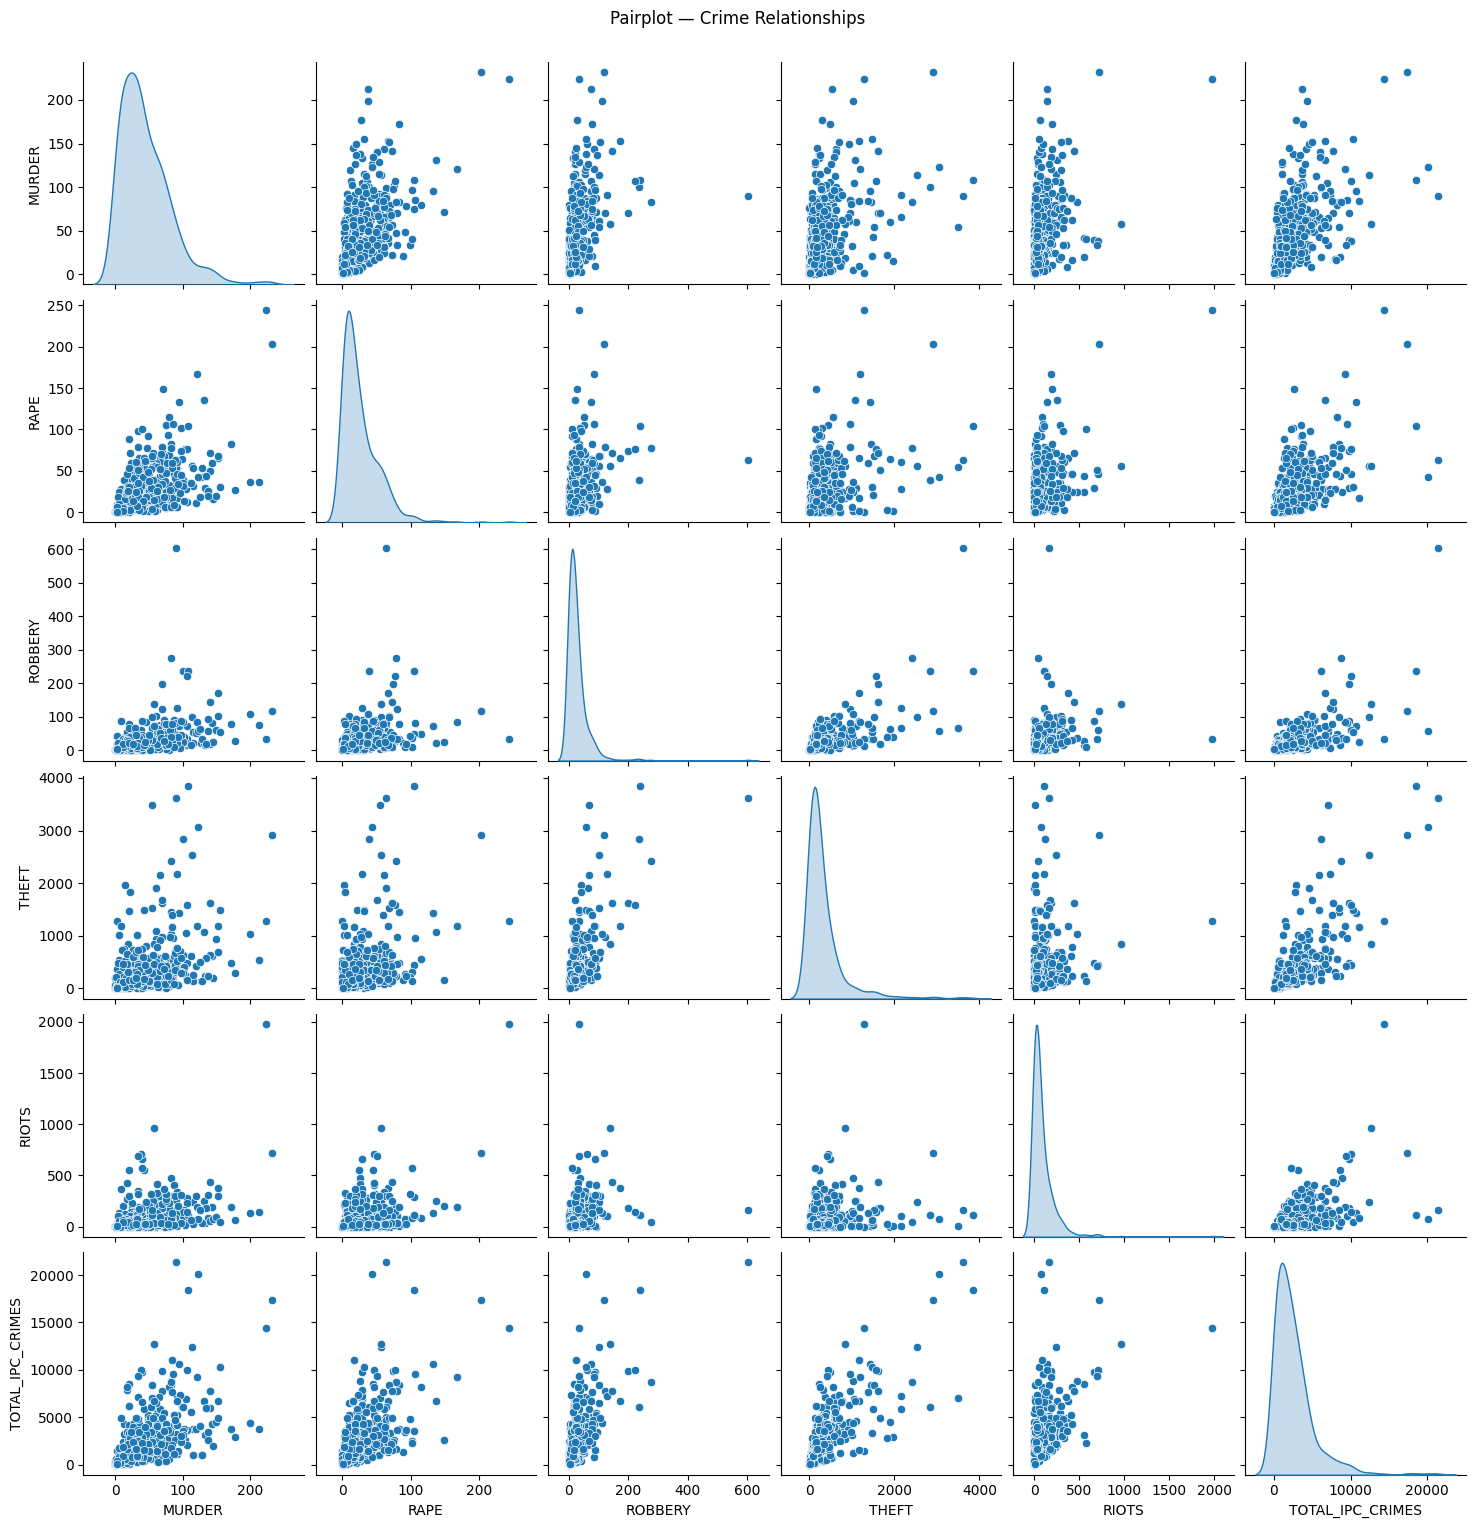

In [225]:
#Pairplot
crime_vars = ['MURDER', 'RAPE', 'ROBBERY', 'THEFT', 'RIOTS', 'TOTAL_IPC_CRIMES']
sns.pairplot(df[crime_vars].sample(500), diag_kind='kde')
plt.suptitle("Pairplot — Crime Relationships", y=1.02)
plt.show()


Visualization 1: Crime Category Comparison (Urban vs Rural)
Visualization 2: Trend Over Time in Urban Cities
Visualization

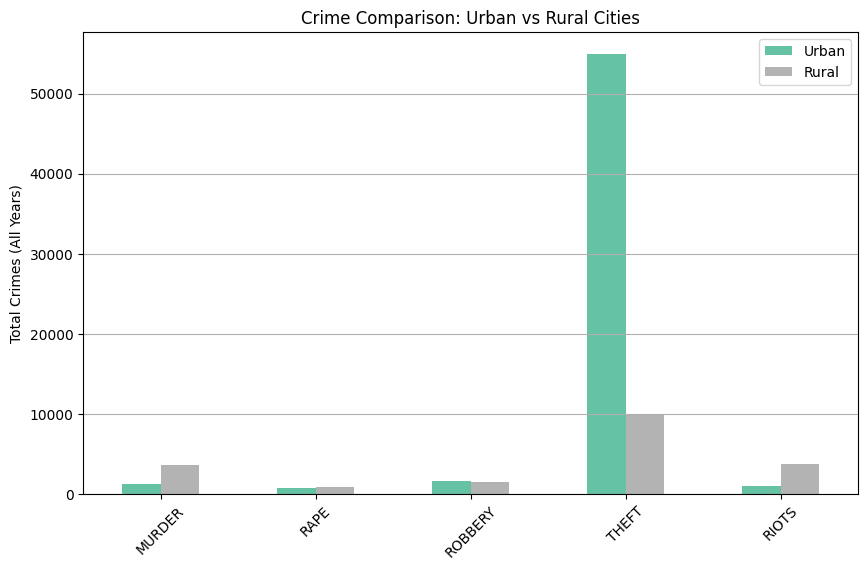

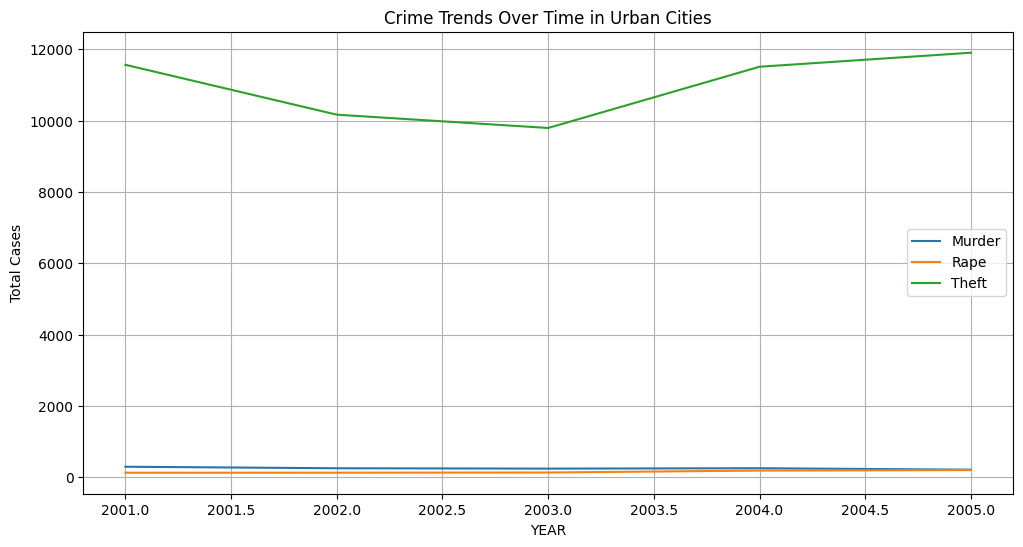

In [226]:
urban_cities = ['Mumbai', 'Hyderabad', 'Bangalore', 'Ahmedabad']
rural_cities = ['Jaunpur', 'Ballia', 'Ghazipur', 'Faizabad', 'Etah']
urban_df = df[df['DISTRICT'].str.title().isin(urban_cities)]
rural_df = df[df['DISTRICT'].str.title().isin(rural_cities)]


# Comparing Crime Categories
crime_cols = ['MURDER', 'RAPE', 'ROBBERY', 'THEFT', 'RIOTS']

# Aggregating urban and rural
urban_sum = urban_df[crime_cols].sum()
rural_sum = rural_df[crime_cols].sum()

# Combining into one DataFrame
compare_df = pd.DataFrame({'Urban': urban_sum, 'Rural': rural_sum})
compare_df.plot(kind='bar', figsize=(10,6), colormap='Set2')
plt.title('Crime Comparison: Urban vs Rural Cities')
plt.ylabel('Total Crimes (All Years)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

urban_time = urban_df.groupby(['YEAR'])[['MURDER', 'RAPE', 'THEFT']].sum().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(data=urban_time, x='YEAR', y='MURDER', label='Murder')
sns.lineplot(data=urban_time, x='YEAR', y='RAPE', label='Rape')
sns.lineplot(data=urban_time, x='YEAR', y='THEFT', label='Theft')
plt.title('Crime Trends Over Time in Urban Cities')
plt.ylabel('Total Cases')
plt.grid()
plt.show()



